# Case Study #1: Are wines that make you drunk faster regarded as higher quality 

# Introduction

This project will be analyzing to analyze 2 data sets, one for red wine and one for white wine. 

The data set contains diffrent parametreics and a quality score.


# Data set

[Reference: https://archive.ics.uci.edu/ml/datasets/Wine+Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)


# Study investigations

 - Do wine with higher quality tend to contain more alcohol

 - Bonus: What about acidity





In [148]:
#importing and loading
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

#checking so everything works and print number of samples, columns
red.shape, white.shape

((1599, 12), (4898, 12))

In [149]:
#Checking for missing values and dtypes
red.info(), white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

(None, None)

In [150]:
# Add a color column to every row to not mix up data when merging
color_red = np.repeat('red',red.shape[0])
color_white = np.repeat('white',white.shape[0])

# add the columns
red['color'] = color_red
white['color'] = color_white
red.head(), white.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality color  
 0      9.4        5   red  
 1      9.8   

In [151]:
# Concat to stack the dfs on top
wine_combined = pd.concat([red,white])


In [152]:
#sort by something that isnt index 
wine_combined_sorted = wine_combined.sort_values(by=['pH']) 

# Check for duplicates after sorting
duplicates_sorted = wine_combined_sorted[wine_combined_sorted.duplicated(keep=False)]

# Print the sorted duplicate rows

print(duplicates_sorted)
#Remove duplicates and check that it works
wine_combined = wine_combined.drop_duplicates()
wine_combined.duplicated().sum()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1960            8.5             0.170         0.31             1.0      0.024   
1959            8.5             0.170         0.31             1.0      0.024   
3832            6.8             0.310         0.19             3.5      0.086   
3831            6.8             0.310         0.19             3.5      0.086   
3588            6.8             0.190         0.71            17.5      0.042   
...             ...               ...          ...             ...        ...   
996             5.6             0.660         0.00             2.2      0.087   
1488            5.6             0.540         0.04             1.7      0.049   
1491            5.6             0.540         0.04             1.7      0.049   
834             7.3             0.205         0.31             1.7      0.060   
830             7.3             0.205         0.31             1.7      0.060   

      free sulfur dioxide  

np.int64(0)

# Exploring and visualisation


We want to see with visuals 
* Which has most positive impact on the wine
* Which has most negativ impact on the wine



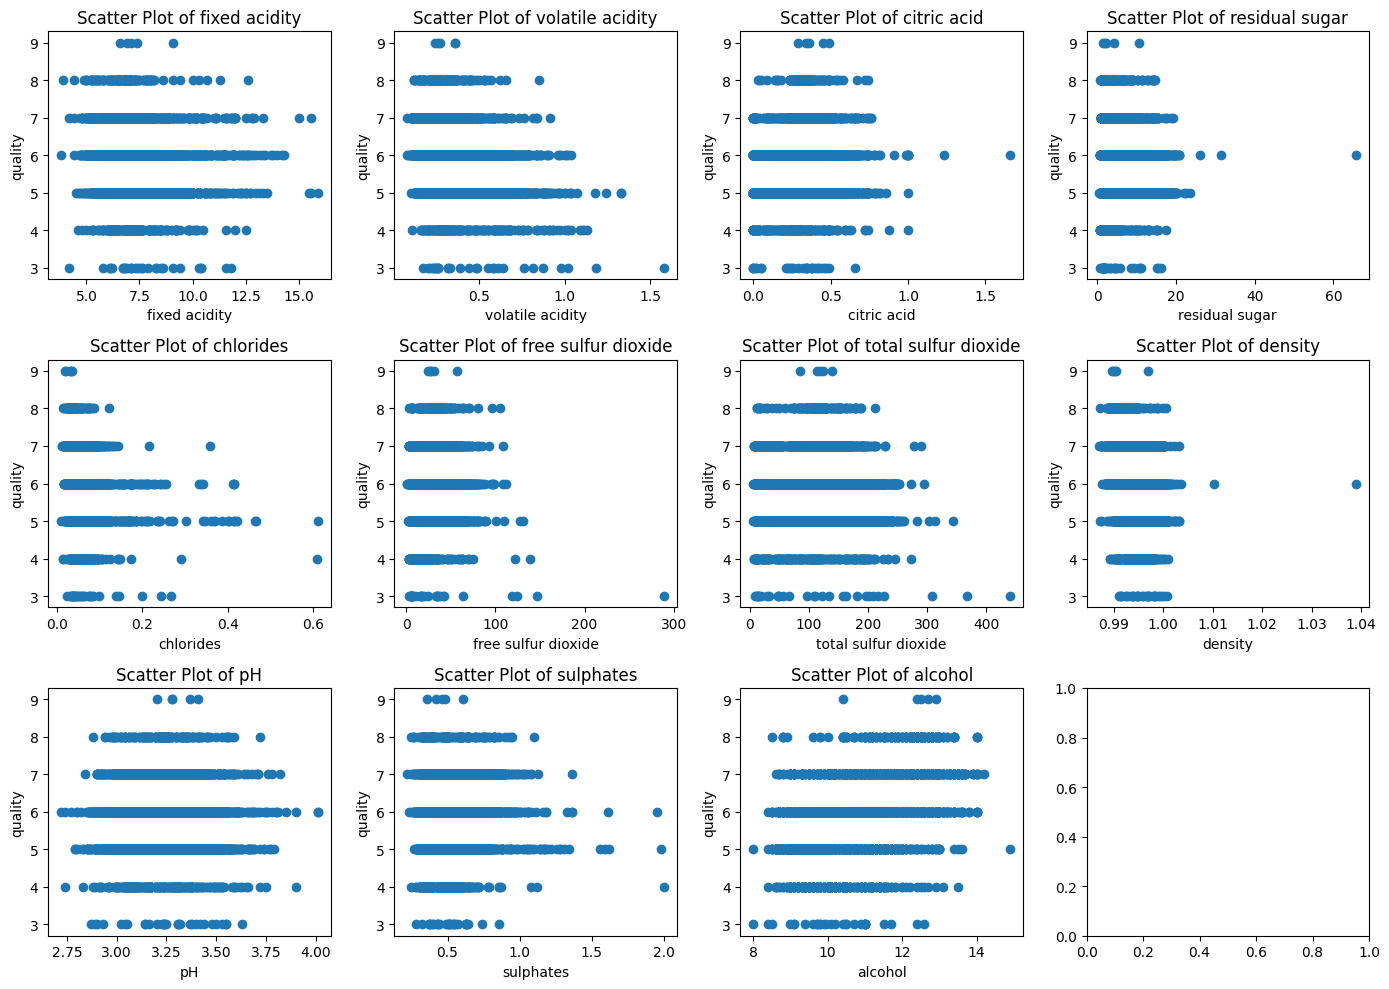

In [153]:
attributes = wine_combined.columns[:11]

fig, axes = plt.subplots(3, 4, figsize=(14, 10))  

axes = axes.flatten()

for i, attribute in enumerate(attributes):
    axes[i].scatter(wine_combined[attribute], wine_combined['quality'])
    axes[i].set_title(f"Scatter Plot of {attribute}")
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('quality')

plt.tight_layout()

### Conclusion

Positive impact: Alcohol

negativ impact: Volatile acid,

Do further illustrate we can do a heatmap

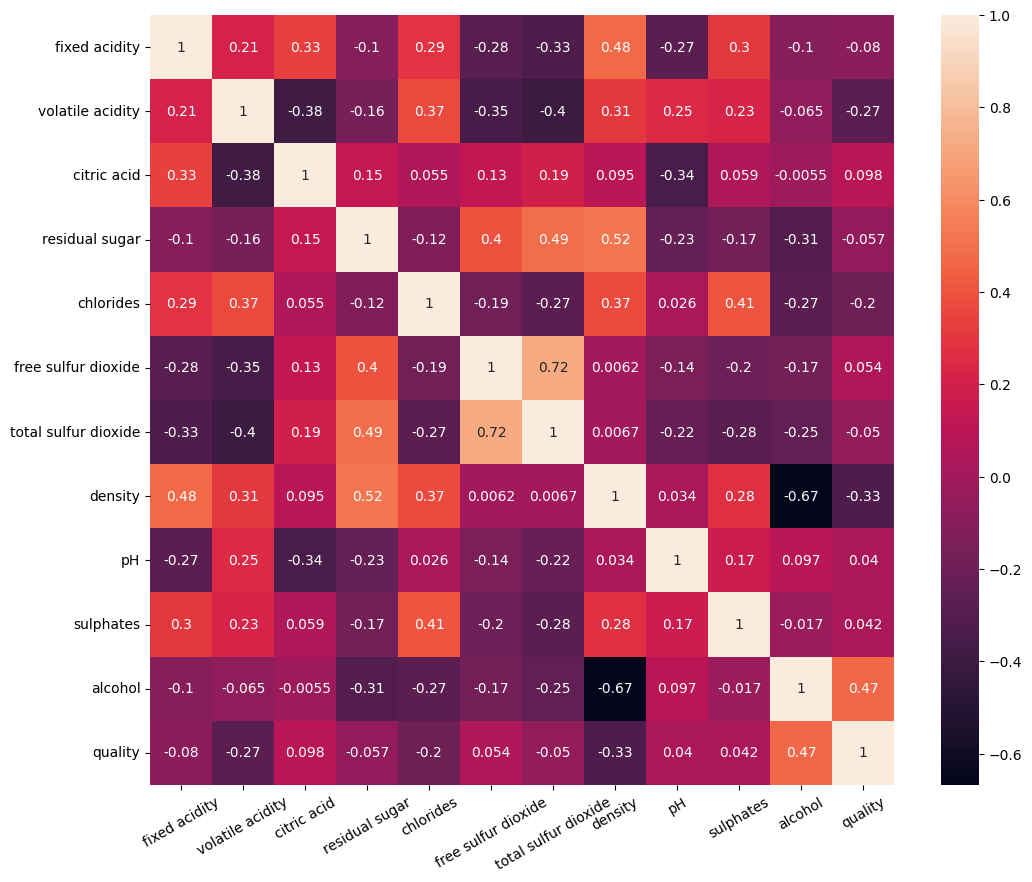

In [154]:
#Remove color column and corr to get a correlation number
corr = wine_combined.iloc[:, :-1].corr()

#plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=30)
plt.show()

It seems that the more alcohol the wine gets the higher the quality, lets further investigate 

In [155]:
wine_combined['alcohol'].median()

np.float64(10.4)

In [156]:
low_alcohol = wine_combined.query('alcohol < 10.3')
high_alcohol = wine_combined.query('alcohol >= 10.3')
low_alcohol['quality'].mean(), high_alcohol['quality'].mean()


(np.float64(5.428057553956834), np.float64(6.122072391767211))

# Conclusion

Wines with higher alcohol tend to get better ratings, which also mean your local sommelier is probably an alcoholic

# What level of acidity receives the highest average rating?
Since ph is continoues variable i determine tiers and assign difffrents ranges to diffrent tier, then assign this tier to each wine in form of a column to later analyse


In [157]:
#Find the percentiles 
wine_combined['pH'].describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [158]:

# The percentiles comes in 3 tiers, therefor i devide them in such

ph_tier = [2.72, 3.11, 3.21, 3.32, 4.01]
ph_names = ['high','moderate', 'medium','low']

#First sorts tiers into a name, then adds this info as a column into the df
wine_combined['acidity'] = pd.cut(wine_combined['pH'], bins=ph_tier, labels=ph_names)
wine_combined.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderate
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderate
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [159]:
# Find the mean quality of each acidity level with groupby
wine_combined.groupby('acidity',observed=False)['quality'].mean()


acidity
high        5.728024
moderate    5.766917
medium      5.840183
low         5.847470
Name: quality, dtype: float64

# Conclusion

Lower acidity wine gets higher quality score